In [35]:
import matplotlib.pyplot as plt
import numpy as np
def add_labels(x_list, y_list, labels):
    for x, y, label in zip(x_list,y_list, labels):
        plt.text(x+0.25,y+0.25,label)
from sklearn.decomposition import PCA
import pandas as pd
notes = pd.read_csv('./data/notes.txt', sep='\s+')
cls = PCA(n_components=4)
pcs = cls.fit_transform(notes)
cls.components_

array([[ 0.51453535,  0.50698853,  0.49235486,  0.48462835,  0.03062778],
       [-0.56694916, -0.37199576,  0.65035356,  0.32323853,  0.11289333],
       [ 0.05132308,  0.01445296, -0.10806565, -0.02254331,  0.99245689],
       [-0.28874852,  0.55305647,  0.39373536, -0.67419539,  0.03443659]])

In [36]:
plt.rcParams['"figure.figsize'] = (5,3)
plt.bar(['AXE 1','AXE2','Axe3','Axe4'],cls.explained_variance_)

KeyError: '"figure.figsize is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

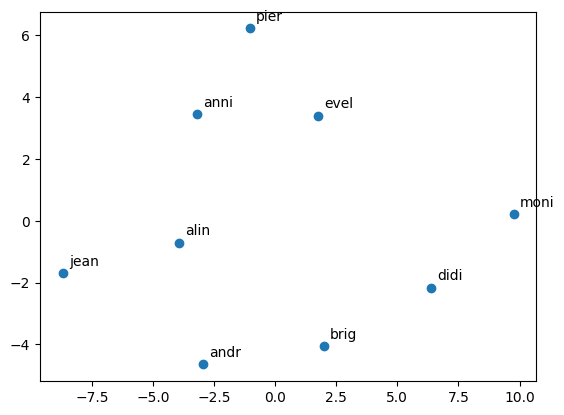

In [37]:
plt.scatter(pcs[:,0],pcs[:,1])
add_labels(pcs[:,0],pcs[:,1],notes.index)

Charger le jeu de données « notes » et définir les matrices $M$ et $D_p$.

In [49]:
df = pd.read_csv('./data/notes.txt',sep='\s+')
notes = df.to_numpy()
n, p =notes.shape
M = np.eye(p)
Dp = 1/n * np.eye(n)
notes

array([[ 6. ,  6. ,  5. ,  5.5,  8. ],
       [ 8. ,  8. ,  8. ,  8. ,  9. ],
       [ 6. ,  7. , 11. ,  9.5, 11. ],
       [14.5, 14.5, 15.5, 15. ,  8. ],
       [14. , 14. , 12. , 12.5, 10. ],
       [11. , 10. ,  5.5,  7. , 13. ],
       [ 5.5,  7. , 14. , 11.5, 10. ],
       [13. , 12.5,  8.5,  9.5, 12. ],
       [ 9. ,  9.5, 12.5, 12. , 18. ]])

Centrer le jeu de donnée

In [50]:
notes_mean = notes.mean(axis=0)
notes = notes - notes_mean
notes

array([[-3.66666667, -3.83333333, -5.22222222, -4.55555556, -3.        ],
       [-1.66666667, -1.83333333, -2.22222222, -2.05555556, -2.        ],
       [-3.66666667, -2.83333333,  0.77777778, -0.55555556,  0.        ],
       [ 4.83333333,  4.66666667,  5.27777778,  4.94444444, -3.        ],
       [ 4.33333333,  4.16666667,  1.77777778,  2.44444444, -1.        ],
       [ 1.33333333,  0.16666667, -4.72222222, -3.05555556,  2.        ],
       [-4.16666667, -2.83333333,  3.77777778,  1.44444444, -1.        ],
       [ 3.33333333,  2.66666667, -1.72222222, -0.55555556,  1.        ],
       [-0.66666667, -0.33333333,  2.27777778,  1.94444444,  7.        ]])

Calculer la matrice V telle que définie dans le cours et calculer les valeurs et vecteurs propres de la matrice V M en les ordonnant par ordre décroissant. On pourra utiliser la fonction eigh du module linalg :

In [59]:
import scipy.linalg as linalg

V= notes.T @ Dp @ notes
valp, vecp = linalg.eigh(V @ M)

valp = valp[::-1]  # [::-1] 表示从起始位置到结束位置的切片，步长为 -1，即反向获取序列中的元素
vecp=vecp[:,::-1]
valp

array([2.82532498e+01, 1.20747233e+01, 8.61573358e+00, 2.17321823e-02,
       9.86980472e-03])

En déduire les axes factoriels de l’ACP du nuage de points défini par le jeu de données notes.
Quels sont les pourcentages d’inertie expliquée par chacun de ces axes ?

<BarContainer object of 5 artists>

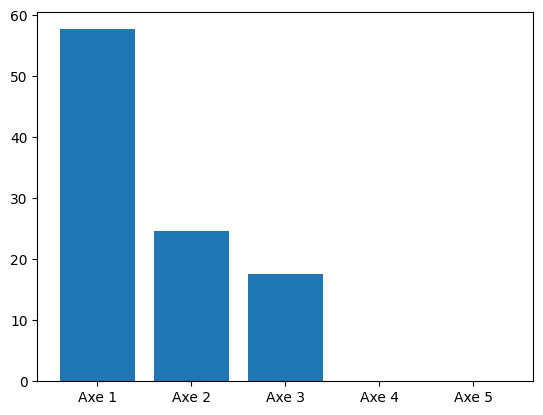

In [60]:
percents = 100 * valp / sum(valp)
plt.bar(['Axe 1','Axe 2','Axe 3','Axe 4','Axe 5'],percents)

array([[ 8.70090684,  1.70270455,  2.55391818, -0.14945398, -0.11731596],
       [ 3.93859585,  0.70854405,  1.81046443, -0.09068389,  0.04349922],
       [ 3.20939241, -3.45905516,  0.30066167,  0.17254286,  0.01928215],
       [-9.75574148, -0.21574207,  3.34367256, -0.17347137,  0.10041455],
       [-6.37142221,  2.17333261,  0.95705878,  0.07066256, -0.18799232],
       [ 2.97401714,  4.65093218, -2.63494569, -0.02321315,  0.14809545],
       [ 1.05096657, -6.22717416,  1.68806364,  0.11529582,  0.04281219],
       [-1.98053256,  4.06855621, -1.40071215,  0.24321198,  0.01039742],
       [-1.76618257, -3.40209823, -6.61818142, -0.16489082, -0.0591927 ]])

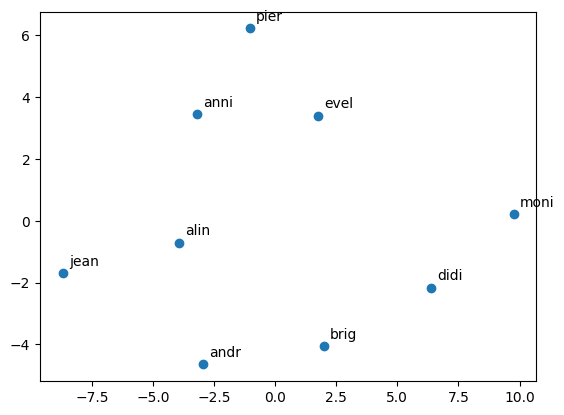

In [61]:
U = vecp
C = notes @ M @ U
plt.scatter(-C[:,0],-C[:,1])
add_labels(-C[:, 0], -C[:, 1], df.index)
C

In [48]:
notes

,math,scie,fran,lati,d-m
jean,6.0,6.0,5.0,5.5,8
alin,8.0,8.0,8.0,8.0,9
anni,6.0,7.0,11.0,9.5,11
moni,14.5,14.5,15.5,15.0,8
didi,14.0,14.0,12.0,12.5,10
andr,11.0,10.0,5.5,7.0,13
pier,5.5,7.0,14.0,11.5,10
brig,13.0,12.5,8.5,9.5,12
evel,9.0,9.5,12.5,12.0,18


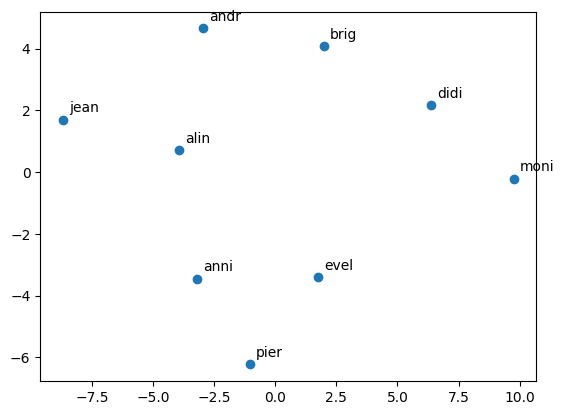

array([[0.11111111, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.11111111, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.11111111, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.11111111, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.11111111,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.11111111, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.11111111, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.11111111, 0.        ],


In [65]:
W = notes @ M @ notes.T
import scipy.linalg as linalg
valp, vecp = linalg.eigh(W @ Dp)
# Forçage à 0 (les valeurs propres doivent être positives)
valp = np.maximum(valp, 0)
valp = valp[::-1] # Ordre décroissant
vecp = vecp[:, ::-1]
# Les composantes principales sont normées. On ajuste la variance pour coincider avec les valeurs propres.
C = vecp * np.sqrt((valp / np.sum(Dp @ vecp**2, axis=0)))
plt.scatter(C[:, 0], C[:, 1])
add_labels(C[:, 0], C[:, 1], df.index)
plt.show()